## Import Pandas and Seaborn

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Preparing Data
### Combining all years into one dataframe

In [2]:
resale_list = ['resale1999.csv','resale2000.csv','resale2012.csv','resale2015.csv','resale2017.csv']

In [3]:
resale_df_list = [pd.read_csv(i) for i in resale_list]


In [4]:
resale = pd.concat(resale_df_list, ignore_index=True)

In [5]:
print(resale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896646 entries, 0 to 896645
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                896646 non-null  object 
 1   town                 896646 non-null  object 
 2   flat_type            896646 non-null  object 
 3   block                896646 non-null  object 
 4   street_name          896646 non-null  object 
 5   storey_range         896646 non-null  object 
 6   floor_area_sqm       896646 non-null  float64
 7   flat_model           896646 non-null  object 
 8   lease_commence_date  896646 non-null  int64  
 9   resale_price         896646 non-null  float64
 10  remaining_lease      187596 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 75.2+ MB
None


In [6]:
resale.to_csv("resale_raw.csv", index = False)

### Replacing the remaining lease column because certain years do not have remaining_lease
### Also adding year, month and date columns

In [7]:
resale = resale.drop(columns=["remaining_lease"])


In [8]:
resale['year'] = pd.DatetimeIndex(pd.to_datetime(resale['month'])).year


In [9]:
resale['date'] = pd.DatetimeIndex(pd.to_datetime(resale['month']))


In [10]:
resale['month'] = pd.DatetimeIndex(pd.to_datetime(resale['month'])).month


In [11]:
resale["remaining_lease"] = (resale['lease_commence_date'] + 99) - resale['year']


In [12]:
cols = list(resale)
cols.insert(0, cols.pop(cols.index("year")))
cols.insert(0, cols.pop(cols.index("date")))
resale = resale.loc[:, cols]

print(resale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896646 entries, 0 to 896645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 896646 non-null  datetime64[ns]
 1   year                 896646 non-null  int64         
 2   month                896646 non-null  int64         
 3   town                 896646 non-null  object        
 4   flat_type            896646 non-null  object        
 5   block                896646 non-null  object        
 6   street_name          896646 non-null  object        
 7   storey_range         896646 non-null  object        
 8   floor_area_sqm       896646 non-null  float64       
 9   flat_model           896646 non-null  object        
 10  lease_commence_date  896646 non-null  int64         
 11  resale_price         896646 non-null  float64       
 12  remaining_lease      896646 non-null  int64         
dtypes: datetime64[

In [13]:
resale.to_csv("resale.csv", index=False)

In [14]:
resale


date  year  month        town  flat_type block       street_name  \
0      1990-01-01  1990      1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
1      1990-01-01  1990      1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
2      1990-01-01  1990      1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
3      1990-01-01  1990      1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
4      1990-01-01  1990      1  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1   
...           ...   ...    ...         ...        ...   ...               ...   
896641 2023-04-01  2023      4      YISHUN     5 ROOM  342A    YISHUN RING RD   
896642 2023-04-01  2023      4      YISHUN     5 ROOM   644      YISHUN ST 61   
896643 2023-04-01  2023      4      YISHUN     5 ROOM   872      YISHUN ST 81   
896644 2023-04-01  2023      4      YISHUN  EXECUTIVE   258      YISHUN ST 22   
896645 2023-04-01  2023      4      YISHUN  EXECUTIVE   828      YISHUN ST 81   

       storey_range  floor_area_sqm         flat_model  lease_commence_date  \
0          10 TO 12            31.0           IMPROVED                 1977   
1          04 TO 06            31.0           IMPROVED                 1977   
2          10 TO 12            31.0           IMPROVED                 1977   
3          07 TO 09            31.0           IMPROVED                 1977   
4          04 TO 06            73.0     NEW GENERATION                 1976   
...             ...             ...                ...                  ...   
896641     01 TO 03           113.0  Premium Apartment                 2016   
896642     07 TO 09           123.0           Improved                 1988   
896643     01 TO 03           127.0           Improved                 1988   
896644     01 TO 03           154.0         Maisonette                 1985   
896645     10 TO 12           142.0          Apartment                 1988   

        resale_price  remaining_lease  
0             9000.0               86  
1             6000.0               86  
2             8000.0               86  
3             6000.0               86  
4            47200.0               85  
...              ...              ...  
896641      680000.0               92  
896642      628888.0               64  
896643      640000.0               64  
896644      808000.0               61  
896645      865000.0               64  

[896646 rows x 13 columns]

## Total count of resale flats in each town

In [15]:
town_count = resale.groupby("town").size().reset_index(name = "count").sort_values("count", ascending = False)

In [16]:
town_count

town  count
23         TAMPINES  77982
26           YISHUN  67975
1             BEDOK  65157
13      JURONG WEST  64661
25        WOODLANDS  63211
0        ANG MO KIO  50898
11          HOUGANG  49014
3       BUKIT BATOK  42583
8     CHOA CHU KANG  36964
4       BUKIT MERAH  33188
17        PASIR RIS  32477
24        TOA PAYOH  30694
21         SENGKANG  30143
19       QUEENSTOWN  28062
10          GEYLANG  27493
9          CLEMENTI  27425
5     BUKIT PANJANG  26789
14  KALLANG/WHAMPOA  26268
12      JURONG EAST  24205
22        SERANGOON  22324
2            BISHAN  20833
18          PUNGGOL  18305
20        SEMBAWANG  12659
16    MARINE PARADE   7880
7      CENTRAL AREA   6939
6       BUKIT TIMAH   2453
15     LIM CHU KANG     64

### Count of houses grouped by town,block,flat_type,street_name,floor_area_sqm and lease_commence_date

In [17]:
house = resale.groupby(["town", "block", "flat_type", "street_name", "floor_area_sqm", "lease_commence_date"]).size().reset_index(name='count').sort_values("count", ascending = False)
house = house.reset_index(drop = True)
house

town block flat_type    street_name  floor_area_sqm  \
0          JURONG WEST   211    3 ROOM    BOON LAY PL            65.0   
1          JURONG WEST   186    3 ROOM   BOON LAY AVE            59.0   
2          JURONG WEST   185    3 ROOM   BOON LAY AVE            59.0   
3          JURONG WEST   208    3 ROOM    BOON LAY PL            65.0   
4          JURONG WEST   210    3 ROOM    BOON LAY PL            65.0   
...                ...   ...       ...            ...             ...   
37588       QUEENSTOWN     3    3 ROOM       DOVER RD            59.0   
37589  KALLANG/WHAMPOA    65    3 ROOM  KALLANG BAHRU            59.0   
37590       QUEENSTOWN     3    3 ROOM    GHIM MOH RD            59.0   
37591  KALLANG/WHAMPOA    65    3 ROOM     JLN MA'MOR           127.0   
37592       QUEENSTOWN   112    4 ROOM  C'WEALTH CRES           121.0   

       lease_commence_date  count  
0                     1976    681  
1                     1975    645  
2                     1975    640  
3                     1976    637  
4                     1977    628  
...                    ...    ...  
37588                 1975      1  
37589                 1981      1  
37590                 1976      1  
37591                 1972      1  
37592                 1969      1  

[37593 rows x 7 columns]

## Helper functions to print graph of prices

In [18]:
def get_unit(unit):
    return  resale[(resale.town == unit.town) 
        & (resale.block == unit.block) 
        & (resale.flat_type == unit.flat_type) 
        & (resale.street_name == unit.street_name) 
        & (resale.floor_area_sqm == unit.floor_area_sqm)
        & (resale.lease_commence_date == unit.lease_commence_date)]

def plot_unit_prices(num, house):
    for i in range(num):
        unit = house.iloc[i]
        a = get_unit(unit)
        a = a.loc[:,["date", "resale_price"]]
        a[f"{unit.flat_type} {unit.town}_{unit.block} ({unit.floor_area_sqm})"] = a["resale_price"]
        a.drop("resale_price", axis=1, inplace=True)
        a = a.reset_index(drop = True)
        if i == 0:
            master = a
        else:
            master = pd.concat([master, a], ignore_index=True)
    f = plt.figure(figsize=(16, 8))
    for i in range(len(master.columns)-1):
        ax = sb.lineplot(x = 'date', y = master.iloc[:, i+1], data = master)

#     ax.set_ylim(0,1000000)
    ax.set_xlim(pd.to_datetime("1990-01-01", format = '%Y-%m-%d'),pd.to_datetime("2020-01-01", format = '%Y-%m-%d'))
    ax.set(ylabel="resale_price")
    return master

def plot_median_unit_prices(num, house):
    for i in range(num):
        unit = house.iloc[i]
        a = get_unit(unit)
        a = a.loc[:,["date", "resale_price"]]
        if i == 0:
            master = a
        else:
            master = pd.concat([master, a], ignore_index=True)
    master = master.groupby("date").median().reset_index()
    f = plt.figure(figsize=(16, 8))
    sb.lineplot(x = 'date', y = "resale_price", data = master)
    return master

# Top 3 Towns with the most flats
## Tampines

# Tampines house prices over time

In [19]:
tamp_house = house[(house.town == "TAMPINES")]
tamp_house

town block  flat_type      street_name  floor_area_sqm  \
256    TAMPINES   267     3 ROOM   TAMPINES ST 21            75.0   
413    TAMPINES   270     3 ROOM   TAMPINES ST 21            75.0   
497    TAMPINES   283     4 ROOM   TAMPINES ST 22           103.0   
502    TAMPINES   271     3 ROOM   TAMPINES ST 21            75.0   
521    TAMPINES   229     5 ROOM   TAMPINES ST 23           121.0   
...         ...   ...        ...              ...             ...   
37544  TAMPINES  518C     5 ROOM  TAMPINES CTRL 7           105.0   
37553  TAMPINES  494J     5 ROOM   TAMPINES ST 45           113.0   
37555  TAMPINES  494D     3 ROOM   TAMPINES ST 43            67.0   
37577  TAMPINES  498B  EXECUTIVE   TAMPINES ST 45           147.0   
37580  TAMPINES  498A  EXECUTIVE   TAMPINES ST 45           147.0   

       lease_commence_date  count  
256                   1983    188  
413                   1985    160  
497                   1984    150  
502                   1984    150  
521                   1985    148  
...                    ...    ...  
37544                 2008      1  
37553                 2018      1  
37555                 2015      1  
37577                 1997      1  
37580                 1997      1  

[3483 rows x 7 columns]

<AxesSubplot:ylabel='Count'>

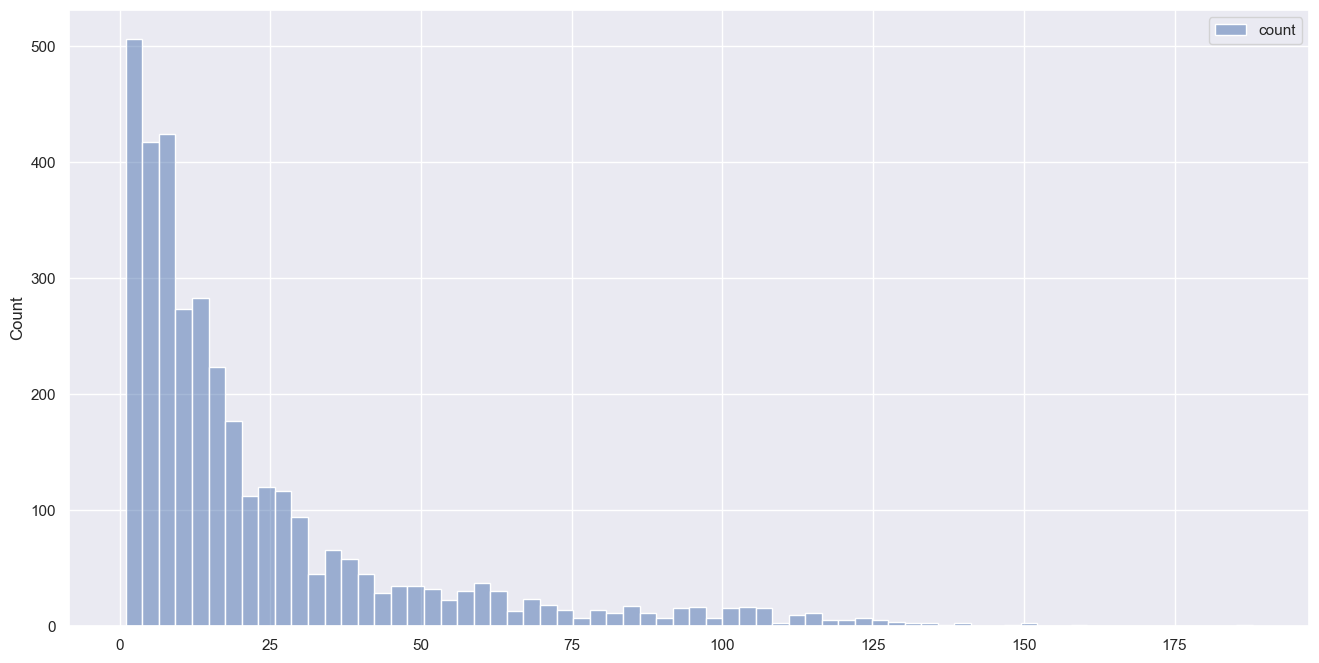

In [20]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = tamp_house.loc[:,["count"]])

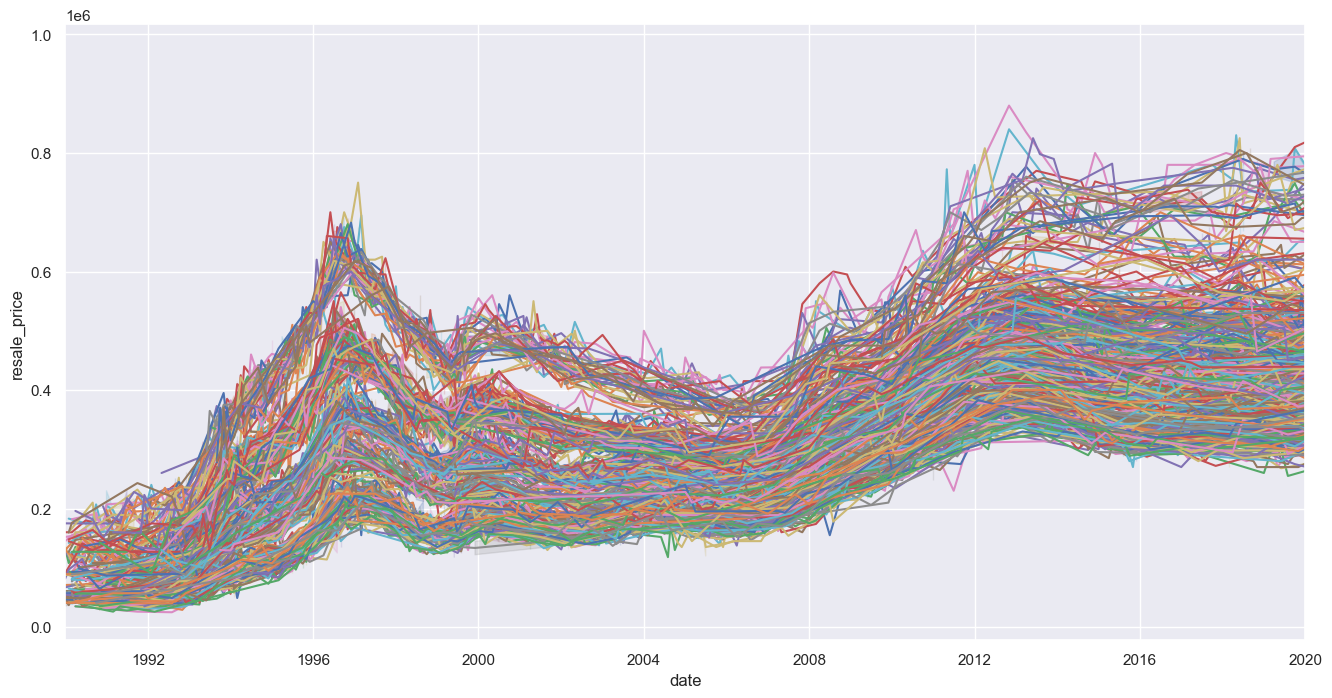

In [21]:
tamp = plot_unit_prices(500, tamp_house)

# Yishun
## Yishun house prices over time

In [22]:
yishun_house = house[(house.town == "YISHUN")]
yishun_house

town block  flat_type     street_name  floor_area_sqm  \
50     YISHUN   114     3 ROOM  YISHUN RING RD            74.0   
79     YISHUN   107     3 ROOM  YISHUN RING RD            67.0   
94     YISHUN   137     3 ROOM  YISHUN RING RD            68.0   
116    YISHUN   774     3 ROOM    YISHUN AVE 3            64.0   
160    YISHUN   706     3 ROOM    YISHUN AVE 5            68.0   
...       ...   ...        ...             ...             ...   
37566  YISHUN   117     4 ROOM  YISHUN RING RD           108.0   
37576  YISHUN   107  EXECUTIVE  YISHUN RING RD           161.0   
37579  YISHUN   108     3 ROOM  YISHUN RING RD            71.0   
37583  YISHUN   109     5 ROOM  YISHUN RING RD           125.0   
37587  YISHUN   111  EXECUTIVE  YISHUN RING RD           152.0   

       lease_commence_date  count  
50                    1983    265  
79                    1982    246  
94                    1985    239  
116                   1987    228  
160                   1984    212  
...                    ...    ...  
37566                 1983      1  
37576                 1982      1  
37579                 1985      1  
37583                 1982      1  
37587                 1982      1  

[2397 rows x 7 columns]

<AxesSubplot:ylabel='Count'>

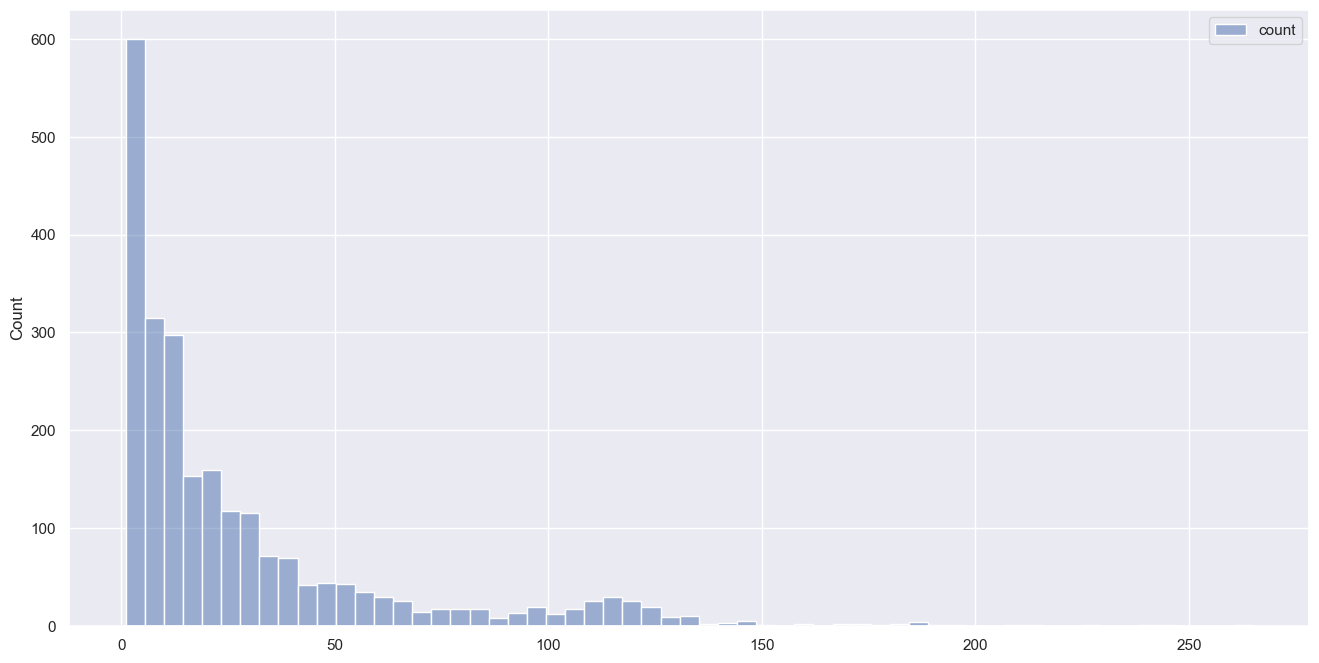

In [23]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = yishun_house.loc[:,["count"]])

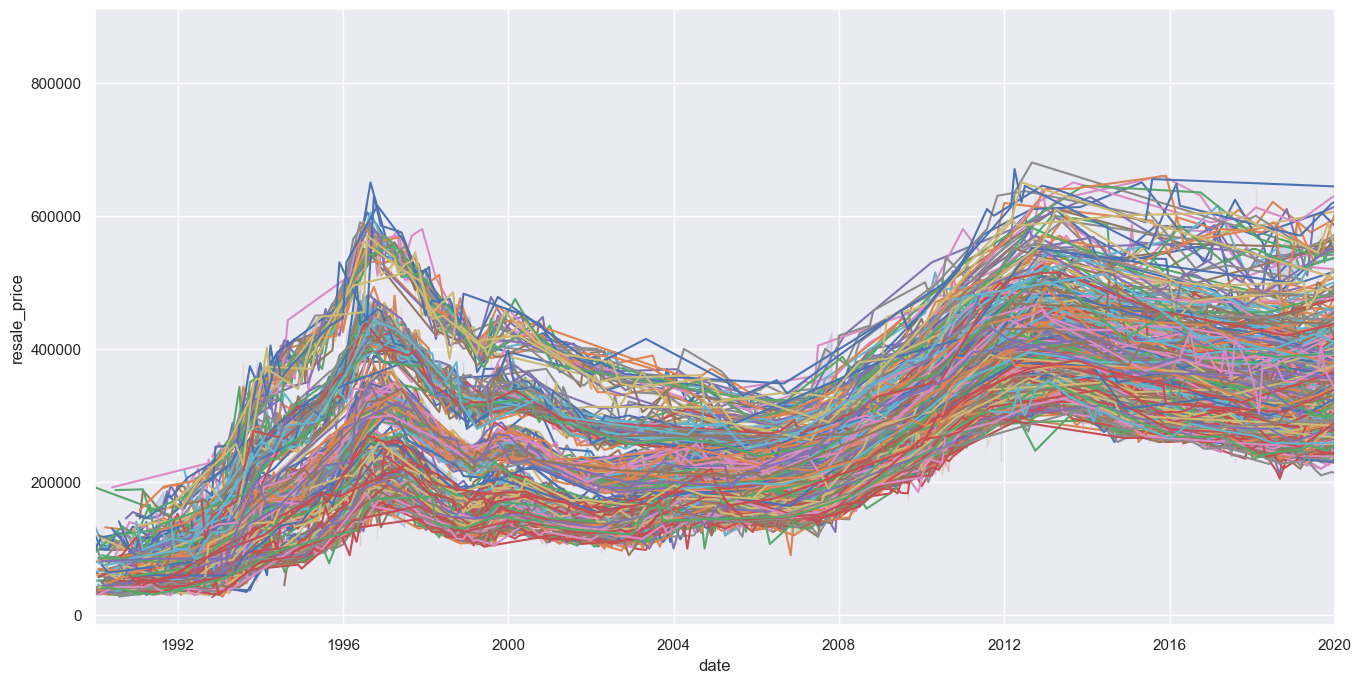

In [24]:
yishun = plot_unit_prices(500, yishun_house)

# Bedok
## Bedok house prices over time

In [25]:
bedok_house = house[(house.town == "BEDOK")]
bedok_house

town block flat_type           street_name  floor_area_sqm  \
14     BEDOK   529    3 ROOM        BEDOK NTH ST 3            68.0   
18     BEDOK   525    3 ROOM        BEDOK NTH ST 3            67.0   
22     BEDOK    18    3 ROOM          BEDOK STH RD            65.0   
25     BEDOK   533    3 ROOM        BEDOK NTH ST 3            68.0   
27     BEDOK   554    3 ROOM        BEDOK NTH ST 3            68.0   
...      ...   ...       ...                   ...             ...   
37096  BEDOK   720    5 ROOM    BEDOK RESERVOIR RD           133.0   
37101  BEDOK   762    5 ROOM  BEDOK RESERVOIR VIEW           117.0   
37102  BEDOK   763    5 ROOM  BEDOK RESERVOIR VIEW           117.0   
37120  BEDOK   765    5 ROOM  BEDOK RESERVOIR VIEW           117.0   
37121  BEDOK   765    5 ROOM  BEDOK RESERVOIR VIEW           112.0   

       lease_commence_date  count  
14                    1979    374  
18                    1979    339  
22                    1976    314  
25                    1980    311  
27                    1980    300  
...                    ...    ...  
37096                 1984      1  
37101                 2000      1  
37102                 2000      1  
37120                 2000      1  
37121                 2000      1  

[1718 rows x 7 columns]

<AxesSubplot:ylabel='Count'>

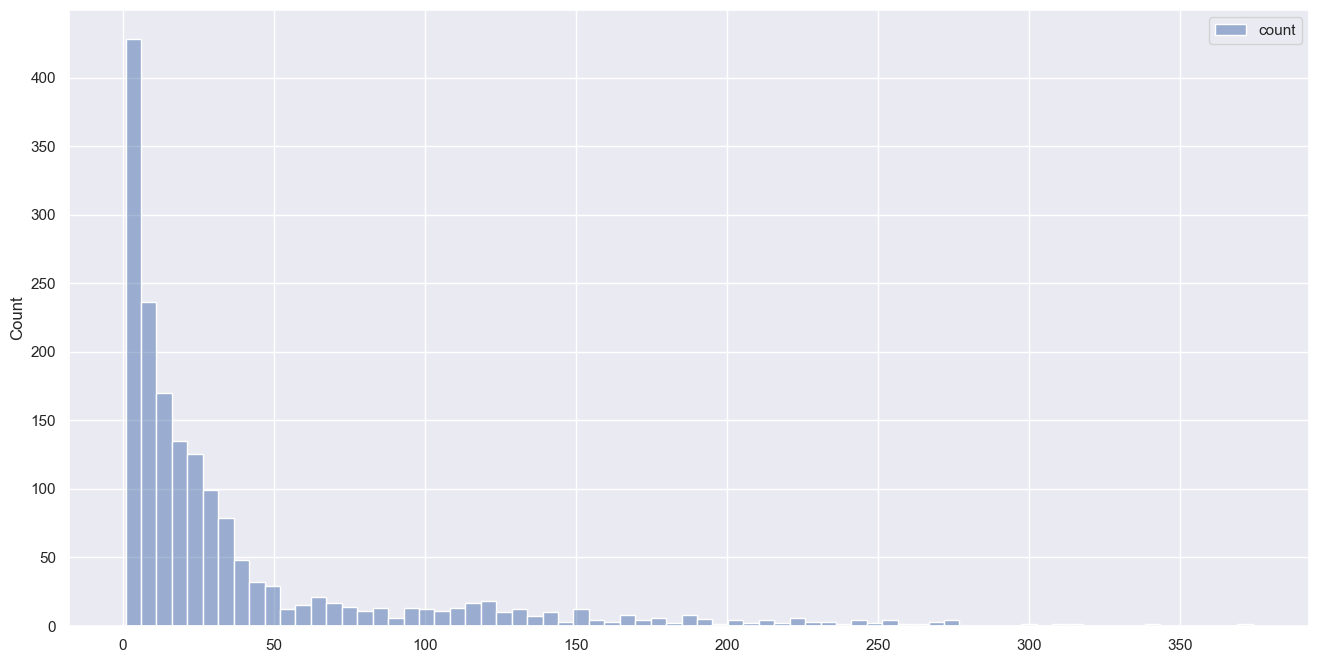

In [26]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = bedok_house.loc[:,["count"]])

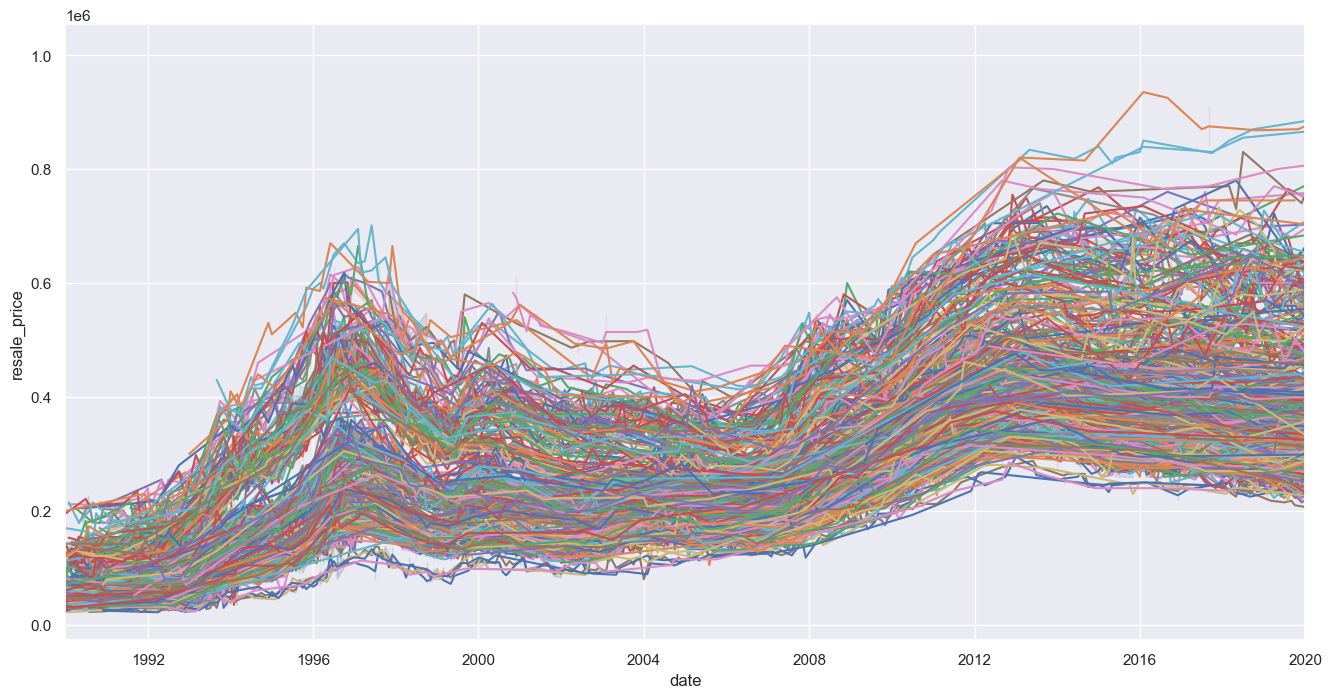

In [27]:
bedok = plot_unit_prices(500, bedok_house)

# Tampines median over time

date  resale_price
0   1990-01-01       57120.0
1   1990-02-01       58500.0
2   1990-03-01       61000.0
3   1990-04-01       59500.0
4   1990-05-01       85500.0
..         ...           ...
395 2022-12-01      480000.0
396 2023-01-01      505000.0
397 2023-02-01      488000.0
398 2023-03-01      520000.0
399 2023-04-01      576000.0

[400 rows x 2 columns]

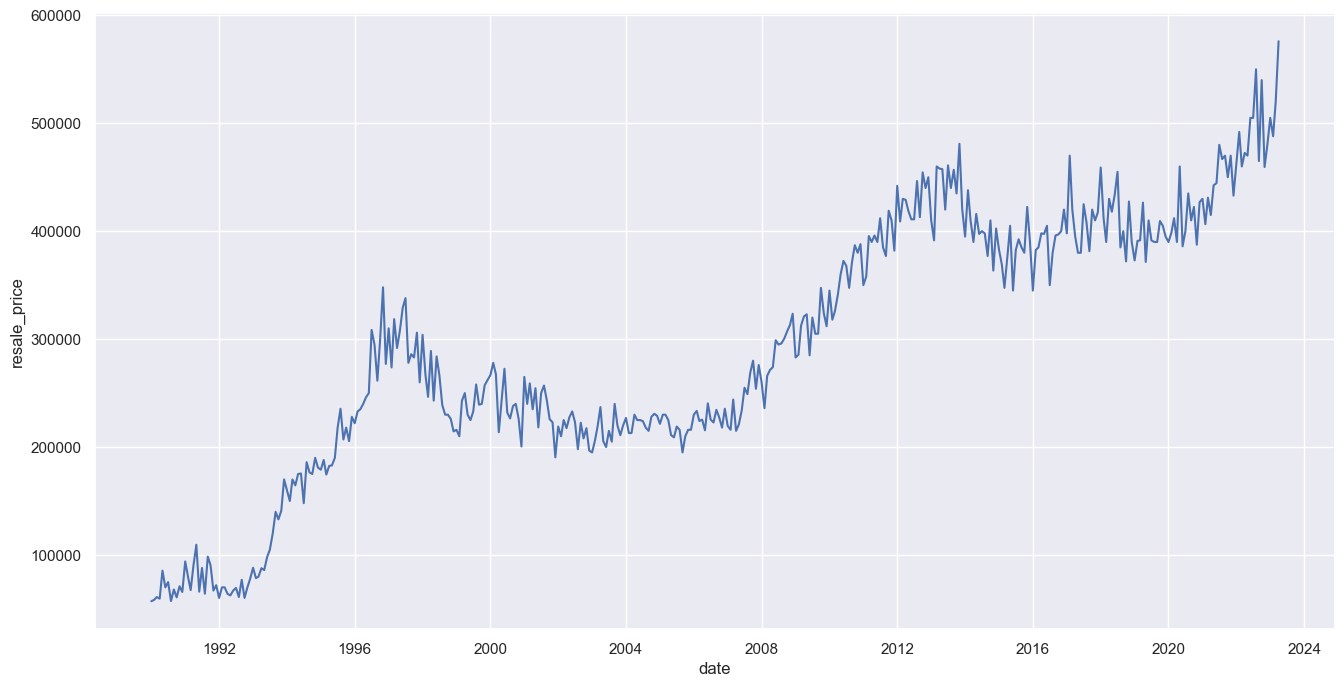

In [28]:
tamp_median = plot_median_unit_prices(500, tamp_house)
tamp_median

# Yishun median over time

date  resale_price
0   1990-01-01       42500.0
1   1990-02-01       44350.0
2   1990-03-01       42700.0
3   1990-04-01       52000.0
4   1990-05-01       52000.0
..         ...           ...
395 2022-12-01      415000.0
396 2023-01-01      407500.0
397 2023-02-01      396500.0
398 2023-03-01      410000.0
399 2023-04-01      382500.0

[400 rows x 2 columns]

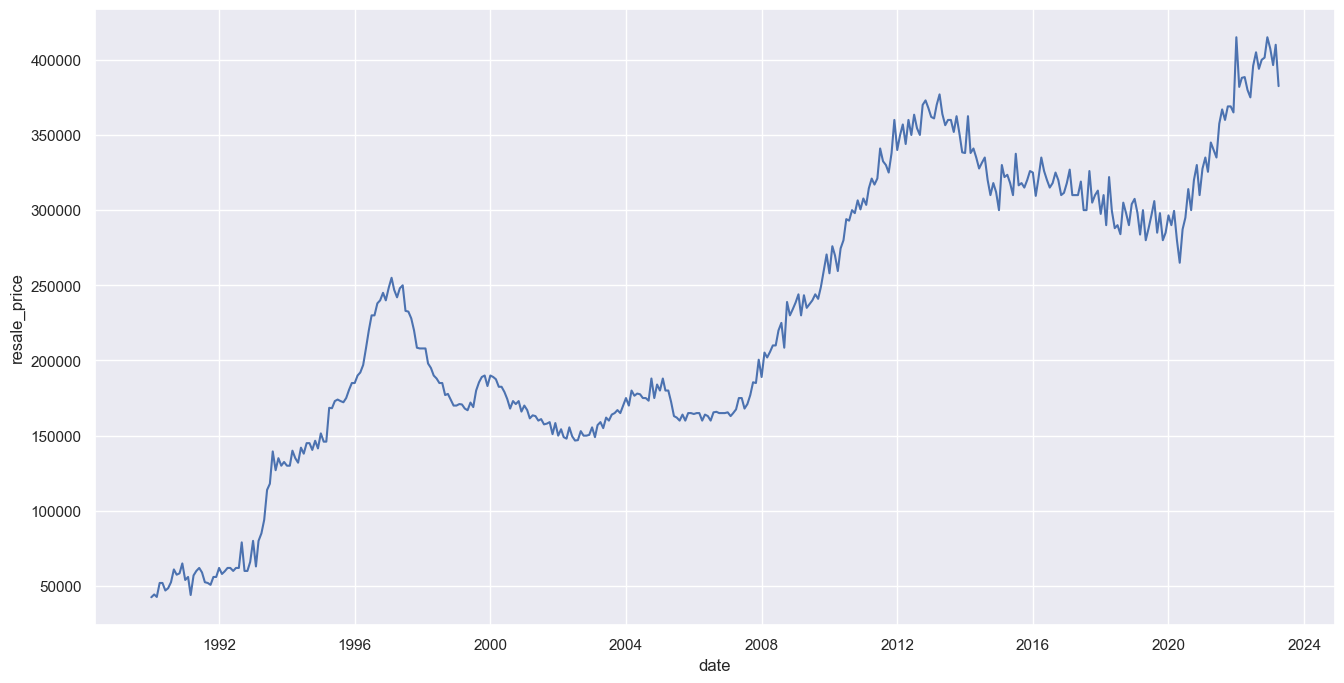

In [29]:
yishun_median = plot_median_unit_prices(500, yishun_house)
yishun_median

# Bedok median over time

date  resale_price
0   1990-01-01       56000.0
1   1990-02-01       47200.0
2   1990-03-01       51750.0
3   1990-04-01       52000.0
4   1990-05-01       52500.0
..         ...           ...
395 2022-12-01      383000.0
396 2023-01-01      400000.0
397 2023-02-01      418500.0
398 2023-03-01      390000.0
399 2023-04-01      385000.0

[400 rows x 2 columns]

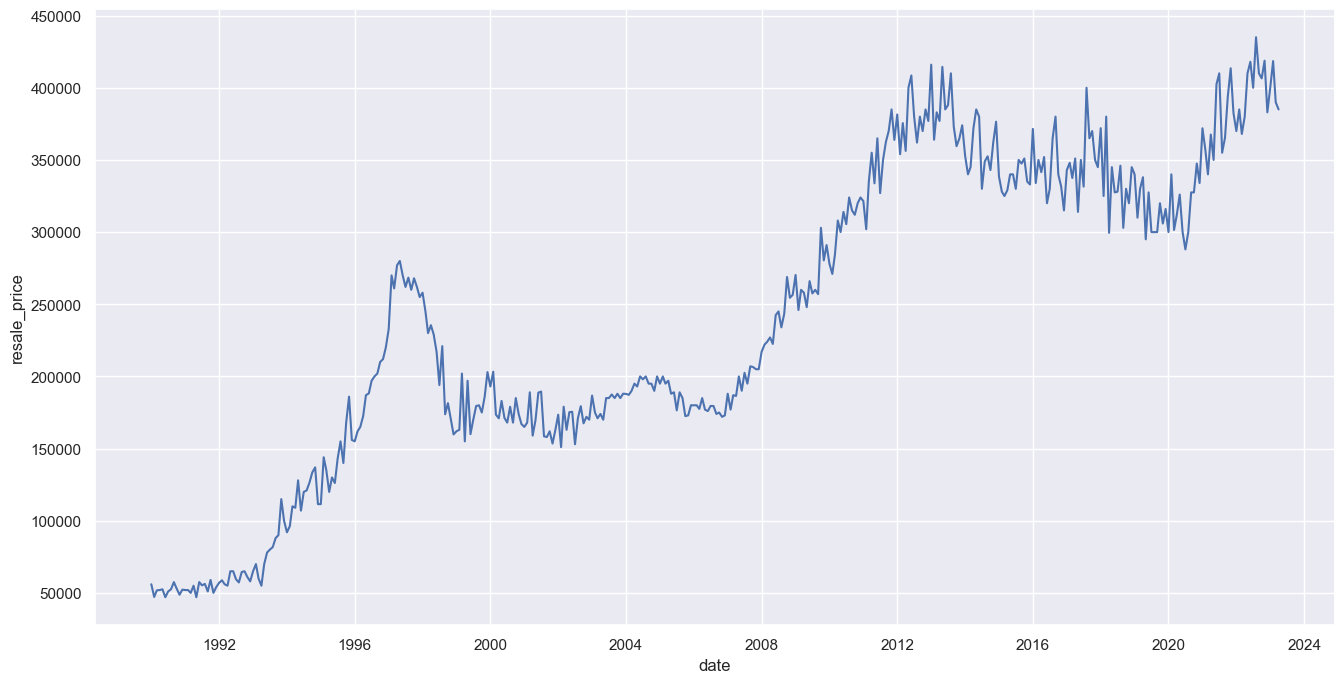

In [30]:
bedok_median = plot_median_unit_prices(500, bedok_house)
bedok_median

# Combination of all three towns(Tampines,Yishun,Bedok)

In [31]:
tamp_yishun_bedok = resale[(resale.town == "TAMPINES") | (resale.town == "YISHUN") | (resale.town == "BEDOK")]

In [32]:
tamp_yishun_bedok

date  year  month    town  flat_type block         street_name  \
151    1990-01-01  1990      1   BEDOK     2 ROOM   620  BEDOK RESERVOIR RD   
152    1990-01-01  1990      1   BEDOK     2 ROOM   534      BEDOK NTH ST 3   
153    1990-01-01  1990      1   BEDOK     3 ROOM    18        BEDOK STH RD   
154    1990-01-01  1990      1   BEDOK     3 ROOM    28   NEW UPP CHANGI RD   
155    1990-01-01  1990      1   BEDOK     3 ROOM    28   NEW UPP CHANGI RD   
...           ...   ...    ...     ...        ...   ...                 ...   
896641 2023-04-01  2023      4  YISHUN     5 ROOM  342A      YISHUN RING RD   
896642 2023-04-01  2023      4  YISHUN     5 ROOM   644        YISHUN ST 61   
896643 2023-04-01  2023      4  YISHUN     5 ROOM   872        YISHUN ST 81   
896644 2023-04-01  2023      4  YISHUN  EXECUTIVE   258        YISHUN ST 22   
896645 2023-04-01  2023      4  YISHUN  EXECUTIVE   828        YISHUN ST 81   

       storey_range  floor_area_sqm         flat_model  lease_commence_date  \
151        07 TO 09            45.0           IMPROVED                 1986   
152        13 TO 15            45.0           IMPROVED                 1986   
153        04 TO 06            65.0           IMPROVED                 1976   
154        07 TO 09            65.0           IMPROVED                 1977   
155        07 TO 09            65.0           IMPROVED                 1977   
...             ...             ...                ...                  ...   
896641     01 TO 03           113.0  Premium Apartment                 2016   
896642     07 TO 09           123.0           Improved                 1988   
896643     01 TO 03           127.0           Improved                 1988   
896644     01 TO 03           154.0         Maisonette                 1985   
896645     10 TO 12           142.0          Apartment                 1988   

        resale_price  remaining_lease  
151          23000.0               95  
152          26000.0               95  
153          28500.0               85  
154          35000.0               86  
155          30000.0               86  
...              ...              ...  
896641      680000.0               92  
896642      628888.0               64  
896643      640000.0               64  
896644      808000.0               61  
896645      865000.0               64  

[211114 rows x 13 columns]

In [33]:
a = tamp_yishun_bedok[tamp_yishun_bedok.town == "TAMPINES"].groupby(["date"]).median().reset_index()

In [34]:
a['resale_price']

0       70500.0
1       65000.0
2       71600.0
3       71600.0
4       88500.0
         ...   
395    545000.0
396    560000.0
397    552500.0
398    578000.0
399    608888.0
Name: resale_price, Length: 400, dtype: float64

In [35]:
median_tamp_yishun_bedok = None


In [36]:
a = tamp_yishun_bedok[tamp_yishun_bedok.town == f"TAMPINES"].groupby(["date"]).median().reset_index()
if median_tamp_yishun_bedok is None:
    median_tamp_yishun_bedok = pd.DataFrame({"date": a["date"], f"TAMPINES": a["resale_price"]})
    print(median_tamp_yishun_bedok.head(5))
else:
    b = pd.DataFrame({"date": a["date"], f"TAMPINES": a["resale_price"]})
    median_tamp_yishun_bedok = pd.concat([median_tamp_yishun_bedok, b], ignore_index=True)

        date  TAMPINES
0 1990-01-01   70500.0
1 1990-02-01   65000.0
2 1990-03-01   71600.0
3 1990-04-01   71600.0
4 1990-05-01   88500.0


In [37]:
a = tamp_yishun_bedok[tamp_yishun_bedok.town == f"BEDOK"].groupby(["date"]).median().reset_index()
if median_tamp_yishun_bedok is None:
    median_tamp_yishun_bedok = pd.DataFrame({"date": a["date"], f"BEDOK": a["resale_price"]})
    print(median_tamp_yishun_bedok.head(5))
else:
    b = pd.DataFrame({"date": a["date"], f"BEDOK": a["resale_price"]})
    median_tamp_yishun_bedok = pd.concat([median_tamp_yishun_bedok, b], ignore_index=True)

In [38]:
a = tamp_yishun_bedok[tamp_yishun_bedok.town == f"YISHUN"].groupby(["date"]).median().reset_index()
if median_tamp_yishun_bedok is None:
    median_tamp_yishun_bedok = pd.DataFrame({"date": a["date"], f"YISHSUN": a["resale_price"]})
    print(median_tamp_yishun_bedok.head(5))
else:
    b = pd.DataFrame({"date": a["date"], f"YISHUN": a["resale_price"]})
    median_tamp_yishun_bedok = pd.concat([median_tamp_yishun_bedok, b], ignore_index=True)

In [39]:
median_tamp_yishun_bedok

date  TAMPINES  BEDOK    YISHUN
0    1990-01-01   70500.0    NaN       NaN
1    1990-02-01   65000.0    NaN       NaN
2    1990-03-01   71600.0    NaN       NaN
3    1990-04-01   71600.0    NaN       NaN
4    1990-05-01   88500.0    NaN       NaN
...         ...       ...    ...       ...
1195 2022-12-01       NaN    NaN  450000.0
1196 2023-01-01       NaN    NaN  465000.0
1197 2023-02-01       NaN    NaN  450000.0
1198 2023-03-01       NaN    NaN  474444.0
1199 2023-04-01       NaN    NaN  450000.0

[1200 rows x 4 columns]

# Median graph of all 3 towns combined

[Text(0, 0.5, 'resale_price')]

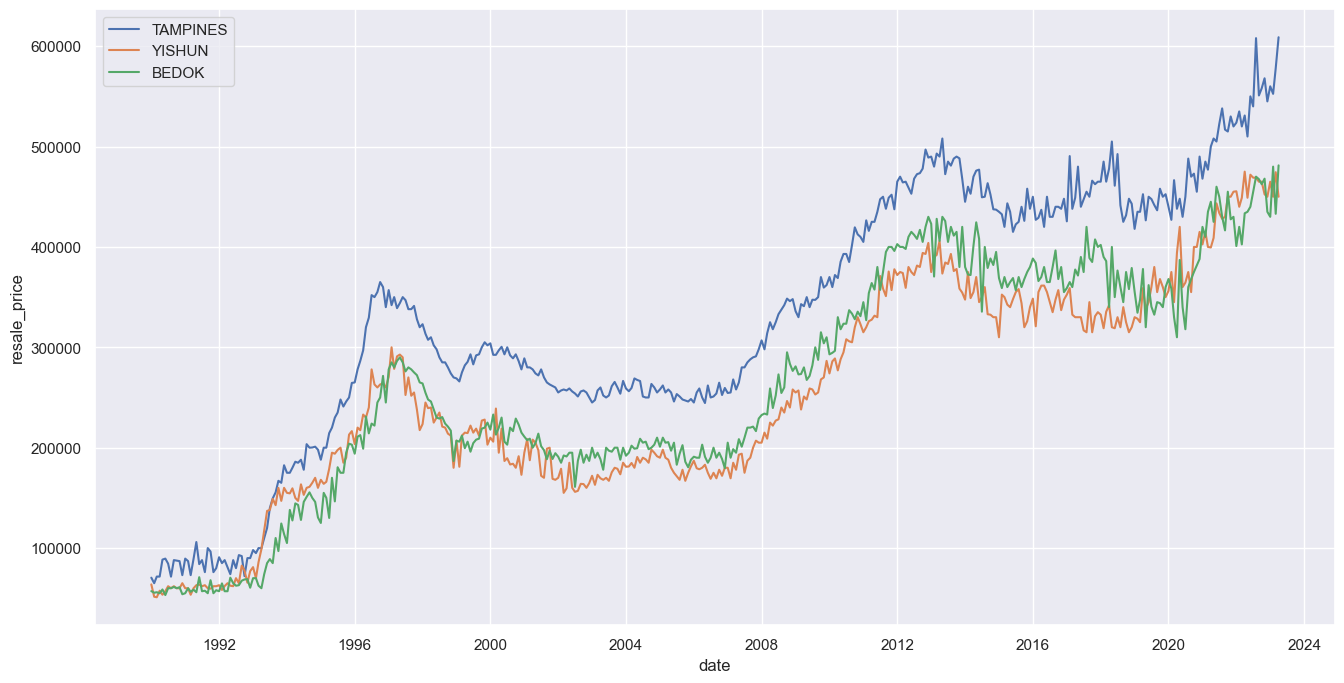

In [40]:
f = plt.figure(figsize=(16, 8))
ax = sb.lineplot(x = 'date', y = "TAMPINES", data = median_tamp_yishun_bedok, label="TAMPINES")
ax = sb.lineplot(x = 'date', y = "YISHUN", data = median_tamp_yishun_bedok, label="YISHUN")
ax = sb.lineplot(x = 'date', y = "BEDOK", data = median_tamp_yishun_bedok, label="BEDOK")
ax.set(ylabel="resale_price")

# Median prices of all types of flats in Tampines

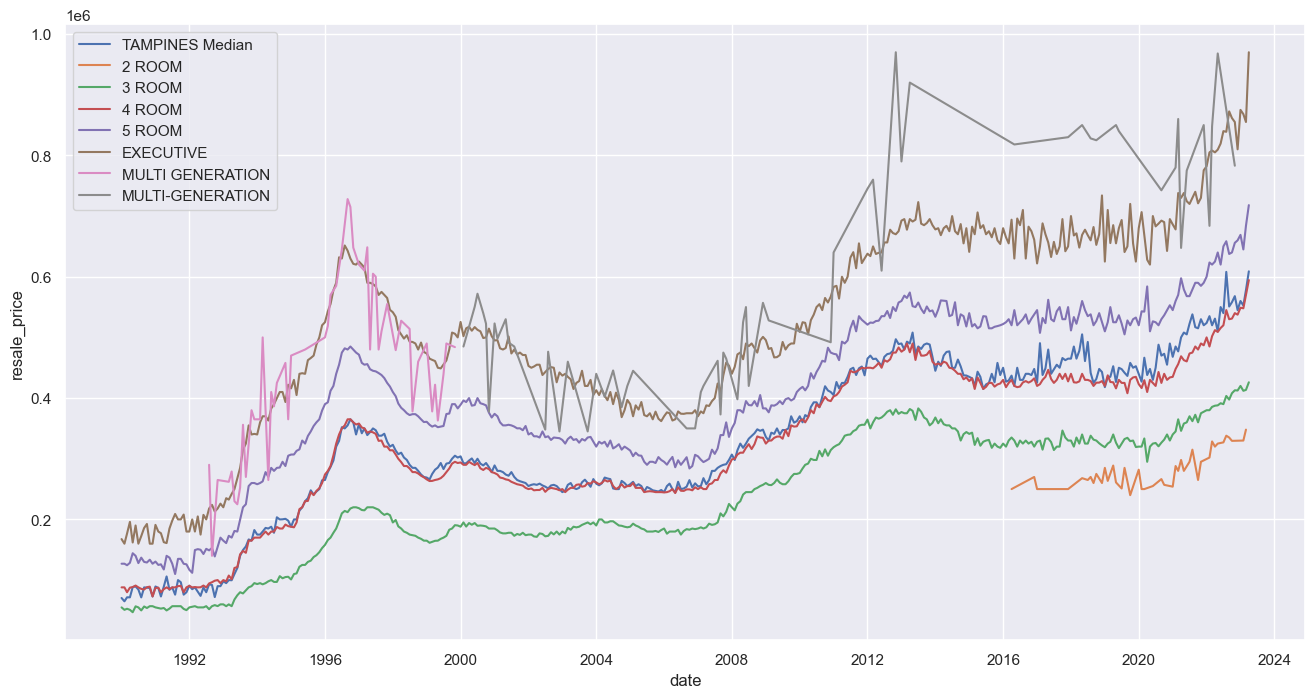

In [41]:
TAMPINES = "TAMPINES"
f = plt.figure(figsize=(16, 8))
TAMPINES_median = resale[resale.town == TAMPINES].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = TAMPINES_median, label= f"TAMPINES Median")

rooms = list(resale[resale.town == TAMPINES].groupby("flat_type").size().reset_index(name = "counts")["flat_type"])
for flat_type in rooms:
    a = resale[(resale.flat_type == flat_type)&(resale.town == TAMPINES)].groupby("date").median().reset_index()
    sb.lineplot(x = 'date', y = "resale_price", data = a, label=flat_type)

# Median prices of all types of flats in Yishun

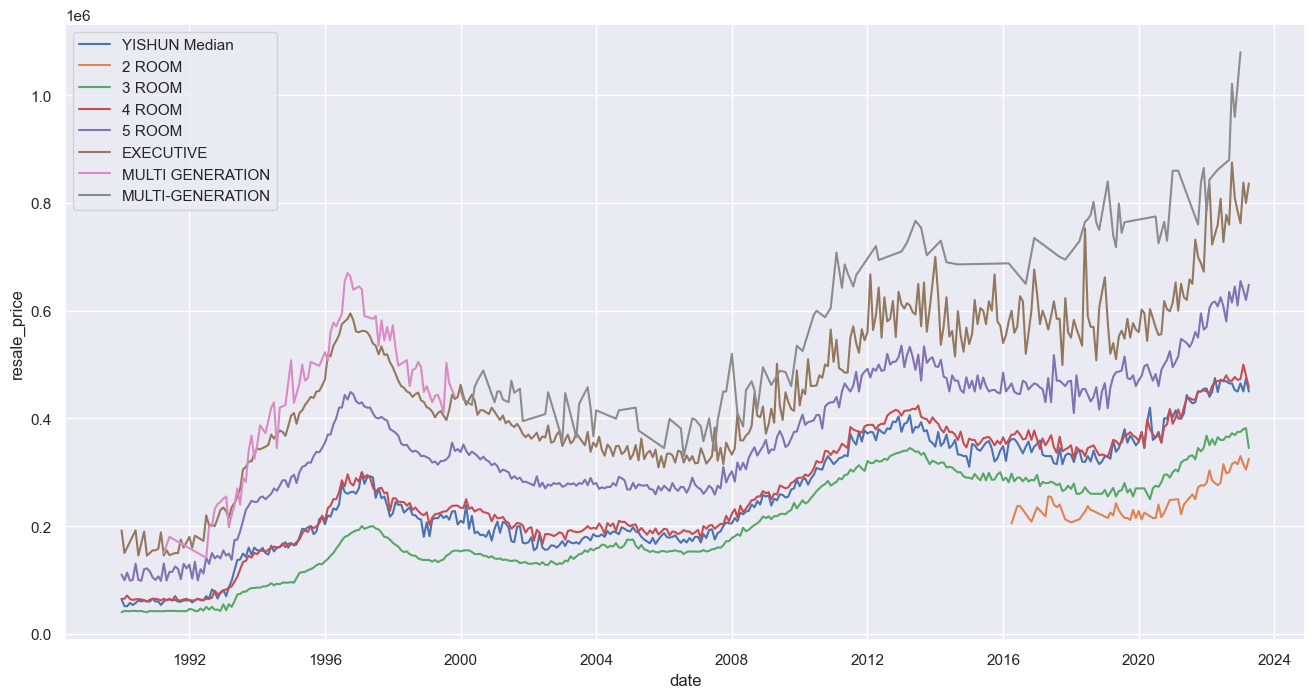

In [42]:
YISHUN = "YISHUN"
f = plt.figure(figsize=(16, 8))
YISHUN_median = resale[resale.town == YISHUN].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = YISHUN_median, label= f"YISHUN Median")

rooms = list(resale[resale.town == YISHUN].groupby("flat_type").size().reset_index(name = "counts")["flat_type"])
for flat_type in rooms:
    a = resale[(resale.flat_type == flat_type)&(resale.town == YISHUN)].groupby("date").median().reset_index()
    sb.lineplot(x = 'date', y = "resale_price", data = a, label=flat_type)

# Median prices of all types of flats in Bedok

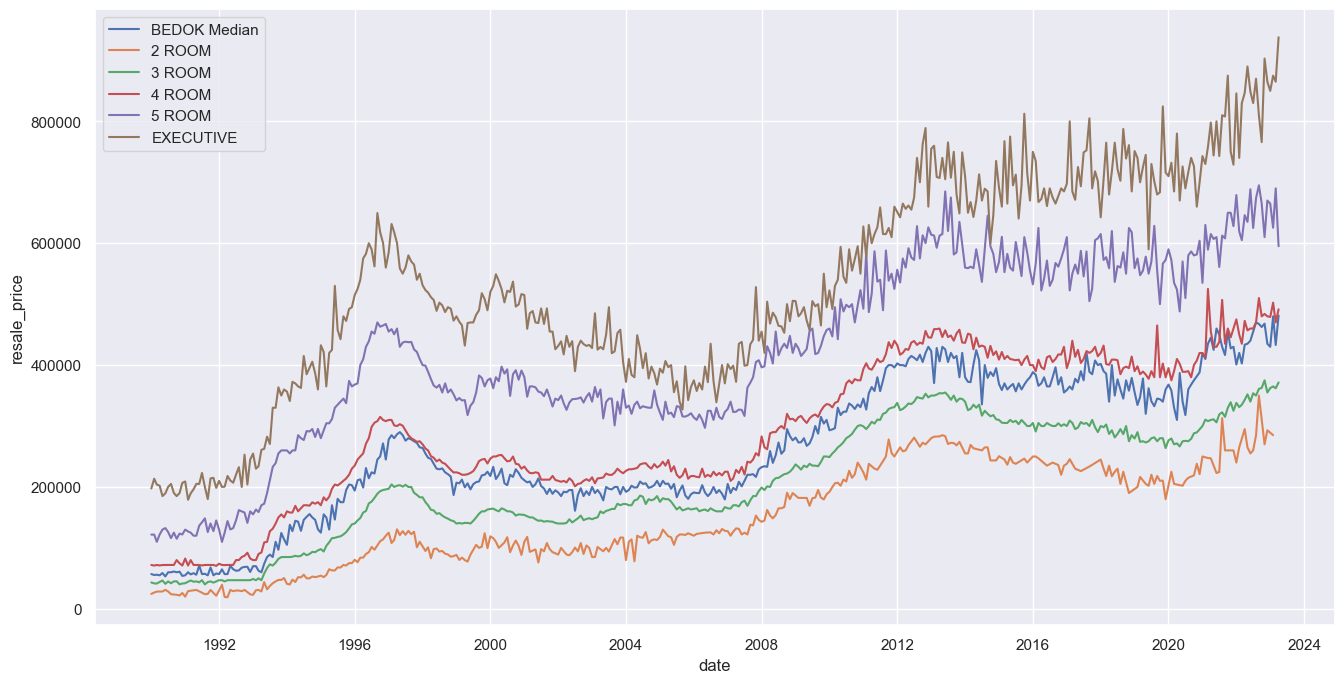

In [43]:
BEDOK = "BEDOK"
f = plt.figure(figsize=(16, 8))
BEDOK_median = resale[resale.town == BEDOK].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = BEDOK_median, label= f"BEDOK Median")

rooms = list(resale[resale.town == BEDOK].groupby("flat_type").size().reset_index(name = "counts")["flat_type"])
for flat_type in rooms:
    a = resale[(resale.flat_type == flat_type)&(resale.town == BEDOK)].groupby("date").median().reset_index()
    sb.lineplot(x = 'date', y = "resale_price", data = a, label=flat_type)

# Outliers Function

In [44]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

#  Highest and lowest outlier

In [47]:
outliers = find_outliers_IQR(resale['resale_price'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))
data1 = resale.where(resale['resale_price'] == 1418000.0)
data2 = resale.where(resale['resale_price'] == 727800.0)
filtered1 = data1.dropna()
filtered2 = data2.dropna()
filtered1


number of outliers: 18160
max outlier value: 1418000.0
min outlier value: 727800.0


date    year  month        town flat_type block street_name  \
877499 2022-07-01  2022.0    7.0  QUEENSTOWN    5 ROOM    92   DAWSON RD   

       storey_range  floor_area_sqm              flat_model  \
877499     37 TO 39           122.0  Premium Apartment Loft   

        lease_commence_date  resale_price  remaining_lease  
877499               2016.0     1418000.0             93.0

In [48]:
filtered2

date    year  month     town  flat_type block    street_name  \
718368 2015-07-01  2015.0    7.0  HOUGANG  EXECUTIVE   533  HOUGANG AVE 6   

       storey_range  floor_area_sqm  flat_model  lease_commence_date  \
718368     10 TO 12           145.0  Maisonette               1988.0   

        resale_price  remaining_lease  
718368      727800.0             72.0